# Retail Data Analytics
- [Retail Data](https://www.kaggle.com/manjeetsingh/retaildataset)

- Predict the department-wide sales for each store for the following year

- Model the eﬀects of markdowns on holiday weeks

- Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

## Problem Statement

This dataset provides historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.There are 3 csv files – Stores, Features and Sales.

We are asked to:
- Predict the department-wide sales for each store for the following year
- Model the effects of markdowns on holiday weeks
- Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

## Exploratory Data Analysis

The goal of this section is to gain an understanding of our data in order to inform what we do in the feature engineering section.

We begin our exploratory data analysis by loading our standard modules.

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#We then load the data, which we have downloaded from the Kaggle website
features=pd.read_csv('Features data set.csv')
sales=pd.read_csv('sales data-set.csv')
stores=pd.read_csv('stores data-set.csv')

In [3]:
print(features.info())
print(features.head())
print(features.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   


In [4]:
print(stores.info())
print(stores.head())
print(stores.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
(45, 3)


In [5]:
print(sales.info())
print(sales.head())
print(sales.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False
(421570, 5)


### Data Cleaning and Merging

In [6]:
#format the Date column
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [7]:
#Merge the data in a unique DataFrame
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
df=pd.merge(df,stores, on=['Store'], how='left')

#fill the NaN with 0
df=df.fillna(0)

#convert 'Type' and 'IsHoliday' columns into a numeric format
types_encoded, types =df['Type'].factorize()
df['Type'] = types_encoded
IsHoliday_encoded, IsHoliday =df['IsHoliday'].factorize()
df['IsHoliday'] = IsHoliday_encoded

In [8]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,2010-12-02,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,2010-05-03,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


In [9]:
#Check for duplicates
print('training_data duplicated:{}'.format(df.duplicated().sum()))

training_data duplicated:0


In [10]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

### Visualization

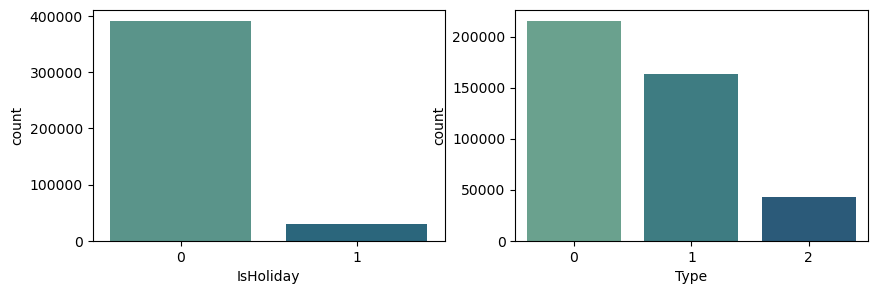

In [11]:
#Categorical features count plot
cat_cols = ['IsHoliday','Type']
plt.figure(figsize=(10, 3))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(1, 2, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 

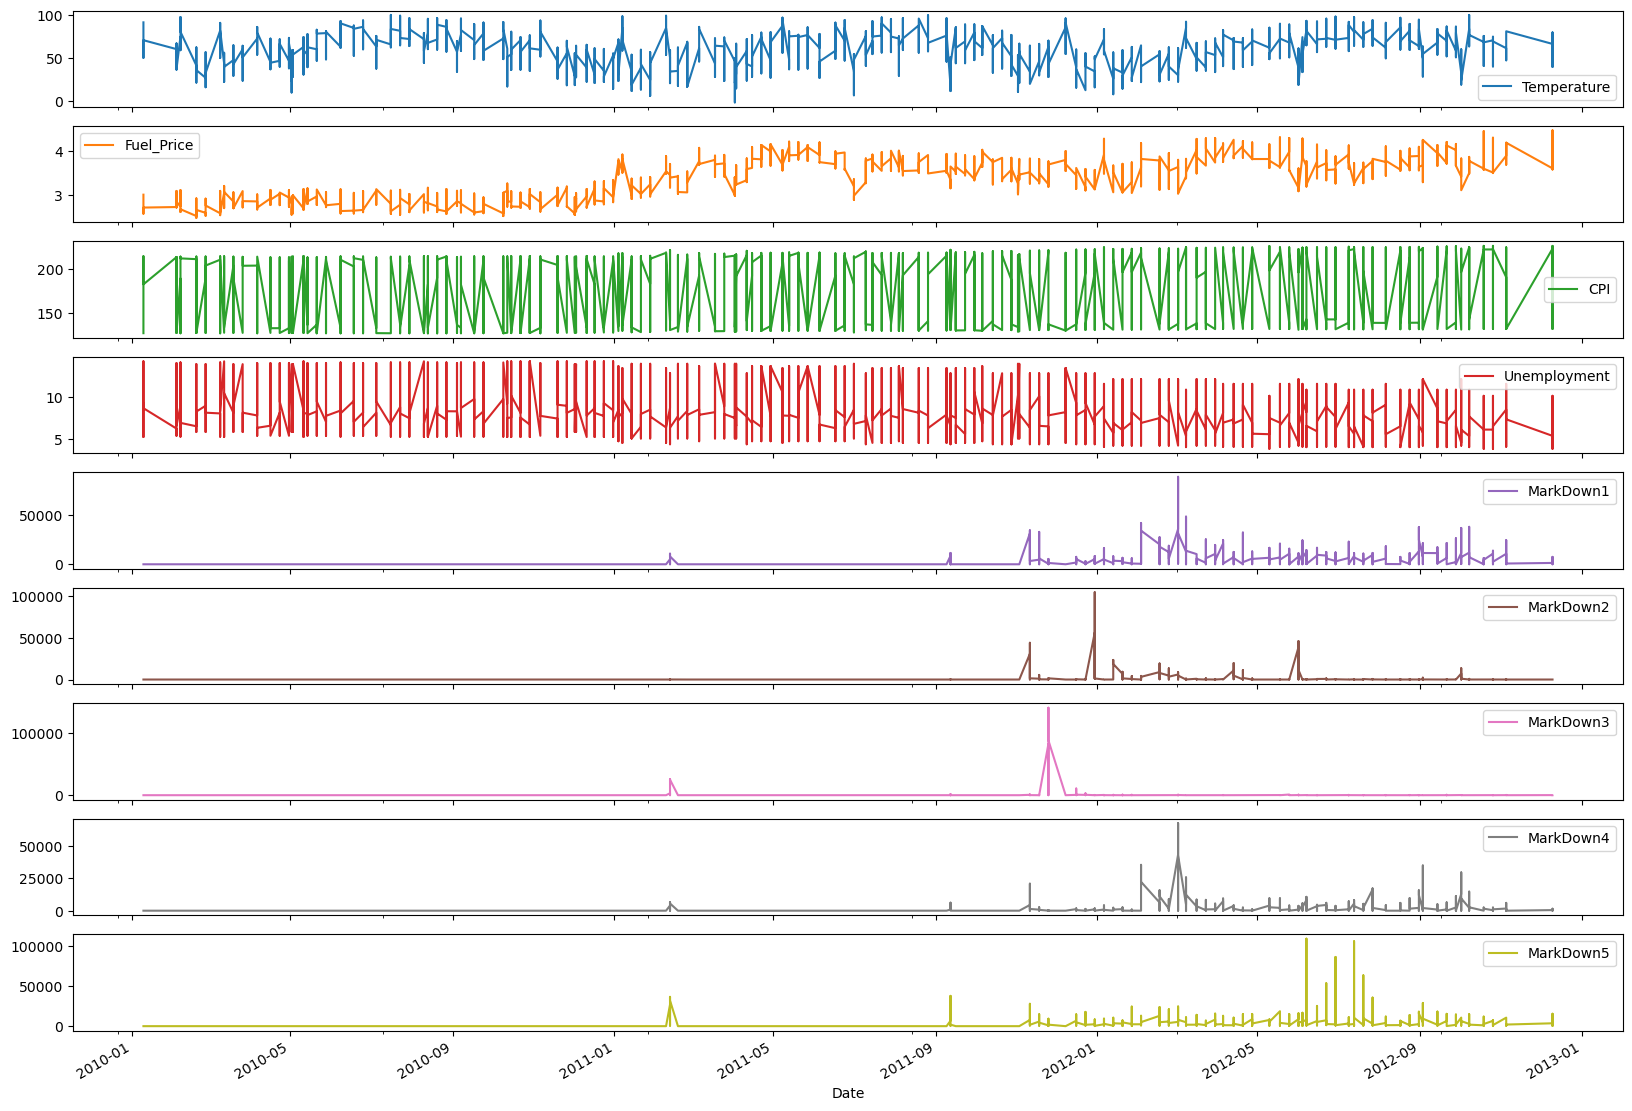

In [12]:
#Show trends of different features over date
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

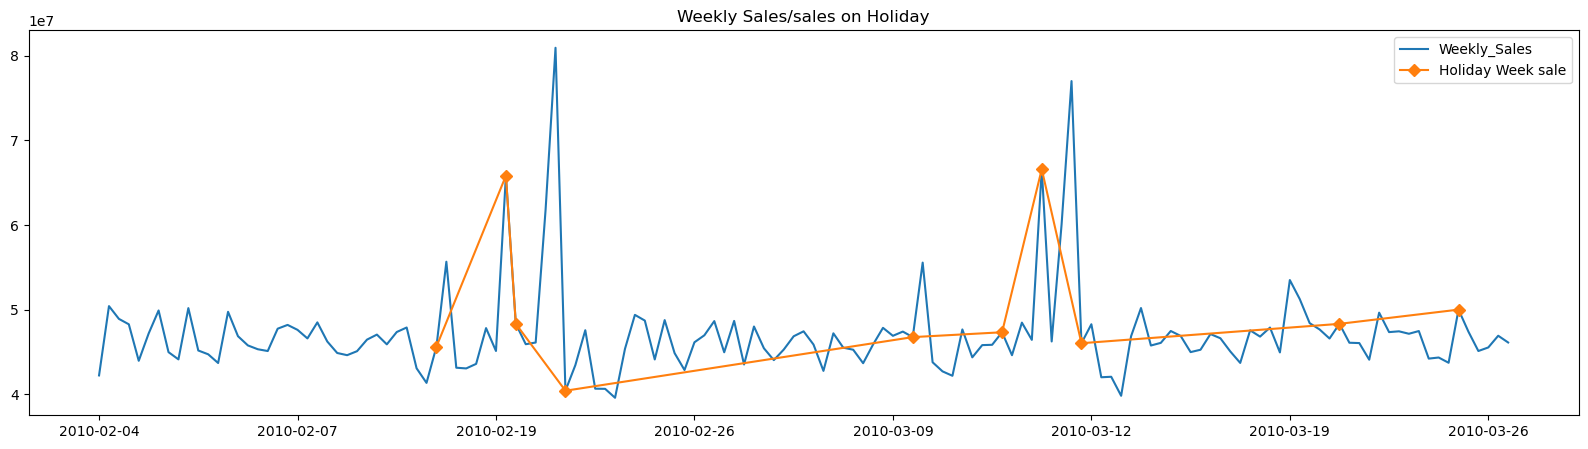

In [22]:
#show sales over date, highlight weekly sales on holiday
df_sales_week = df.groupby(by=['Date'], as_index=False).agg({"Weekly_Sales":"sum","IsHoliday":"sum"})
plt.figure(figsize=(20,5))
ax=df_sales_week.Weekly_Sales.plot(x=df_sales_week.Date,title="Weekly Sales/sales on Holiday")
ax=df_sales_week[df_sales_week.IsHoliday>0]['Weekly_Sales'].plot(x=df_sales_week.Date,marker="D",label="Holiday Week sale")
ax.set_xticklabels(df_sales_week.Date.dt.strftime('%Y-%m-%d'))
ax.legend()
plt.show()

weeks nearby holiday shows peak

Text(0, 0.5, 'Sales')

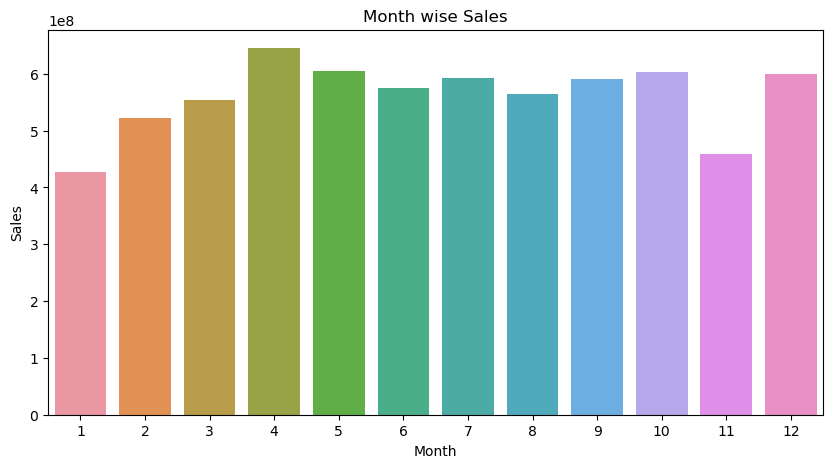

In [23]:
#show sales over month
df_sales_month = df.groupby(df['Date'].dt.month)['Weekly_Sales'].sum()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=df_sales_month.index, y=df_sales_month.values, ax=ax)
ax.set_title("Month wise Sales")
ax.set_xlabel("Month")
ax.set_ylabel("Sales")

- This could be due to enough buying during deals and holidays (Black Friday sales, Christmas, New Years) that sales dip later and then gain momentum again over the course of a few months.
- In November, people reduce buying because they may be waiting for upcoming sales.
- Full data for December 2013 may be not available, because even after the December spike, sales aren't very high.

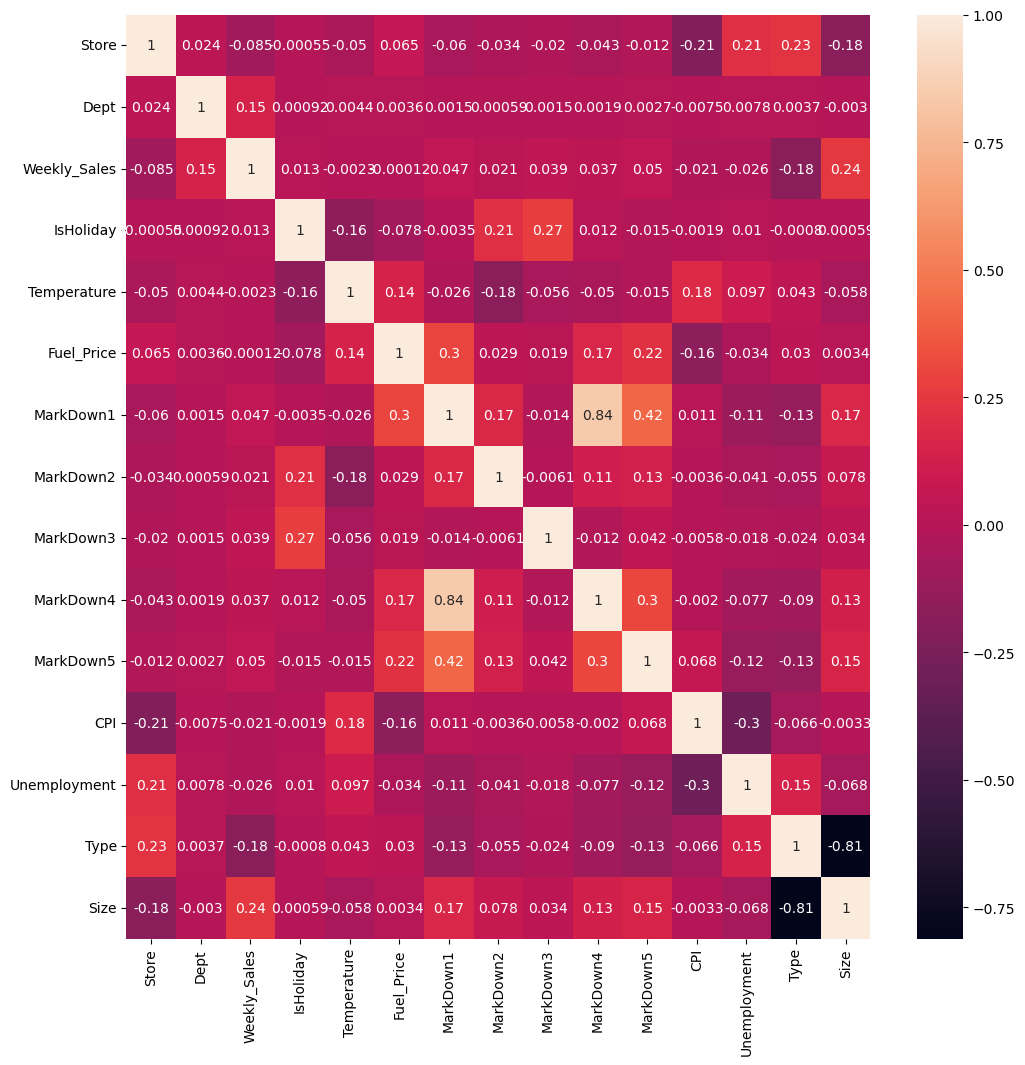

In [24]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(df.corr(), annot=True)

- Weekly sales doesnot show any high correlation with any other parameters.
- Unemployment and Fuel price are negatively correlated
- Size and Type price are negatively correlated

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

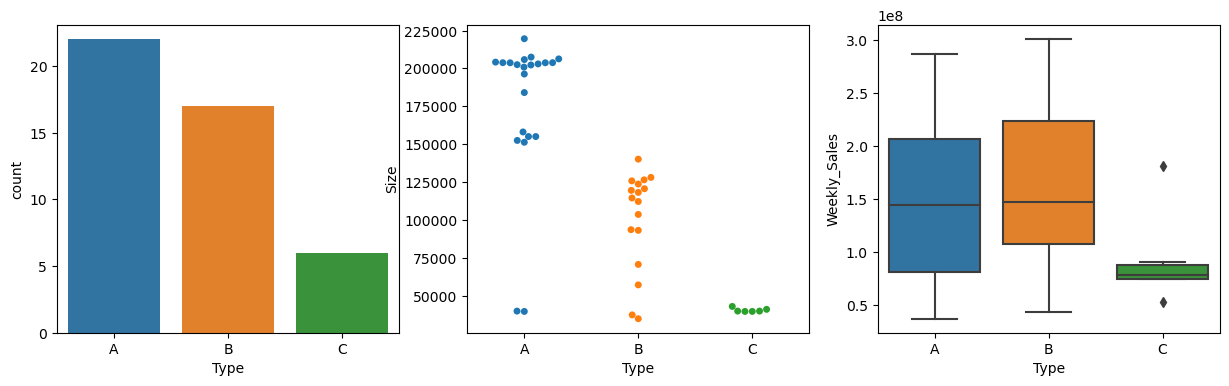

In [25]:
#explore the pattern in store for weekly sales data
df_store = df.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum","Weekly_Sales":"sum"})
stores['temp'] = df_store.Temperature
stores['Fuel_Price'] = df_store.Fuel_Price
stores["holiday"] = df_store.IsHoliday
stores["Weekly_Sales"] = df_store.Weekly_Sales

fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(stores.Type,ax=ax[0])
sns.swarmplot(data = stores,y="Size",x="Type",ax=ax[1])
sns.boxplot(data = stores,y="Weekly_Sales",x="Type",ax=ax[2])

- Store Count is in the order of A, B and least is C
- Size wise A store as most no of Item followed by B and than C
- Even After less Count of Store and lesser Size B has more Weekly Sales than A and C at the least.

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

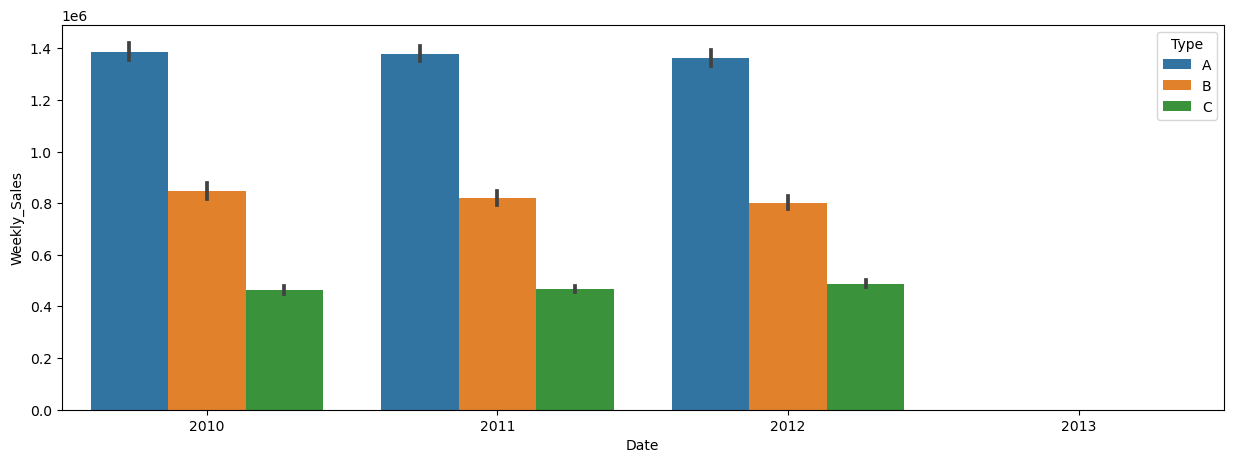

In [26]:
#Analysis Store Type and Year/Month Wise
df_date_store = df.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
df_date_store.reset_index(drop=True)
data_table = pd.merge(features,df_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,stores[["Store","Type"]] ,  how='left', on=["Store"])
plt.figure(figsize=(15, 5))
sns.barplot(x=data_table.Date.dt.year, y=data_table.Weekly_Sales,hue=data_table.Type)

- Store A has the most weekly sales every year
- Store Type A & B has shown slight decrease year on basis in sales.
- Store C has shown a slight increase in sales.

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

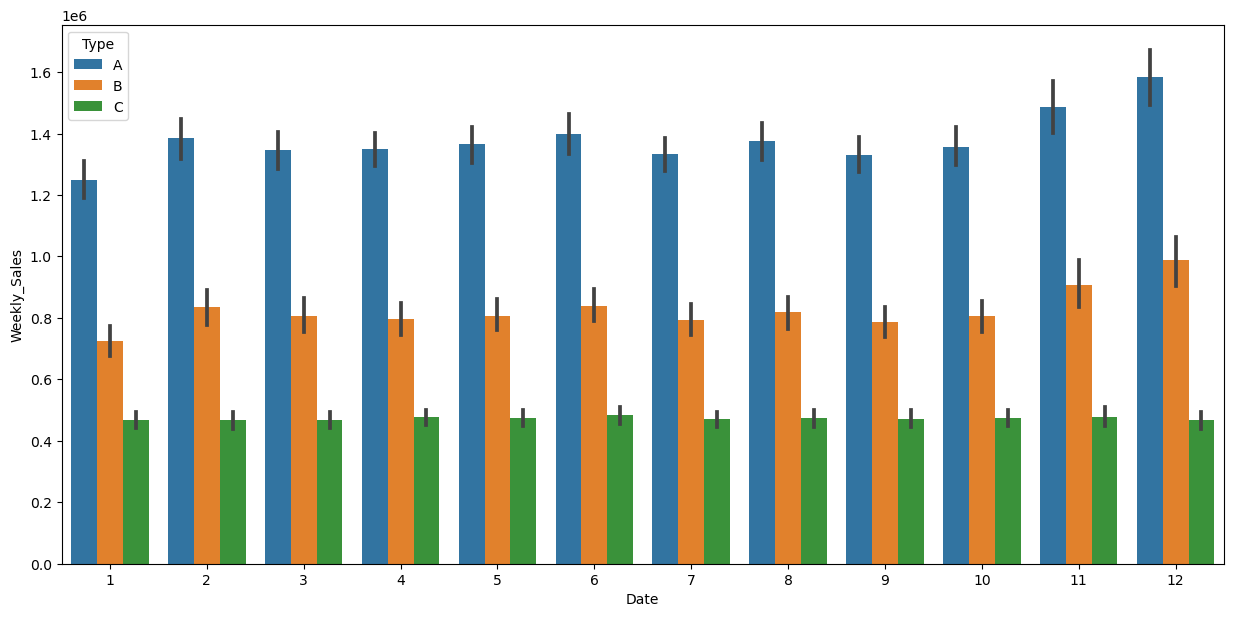

In [27]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_table.Date.dt.month, y=data_table.Weekly_Sales,hue=data_table.Type)

- Store A has the most weekly sales every month
- Type A & B store show spike in Nov and Dec mostly due to holiday whereas Jan has shown decrease in sale.
- Type C is consistent over every month and doesnot show much deviation.

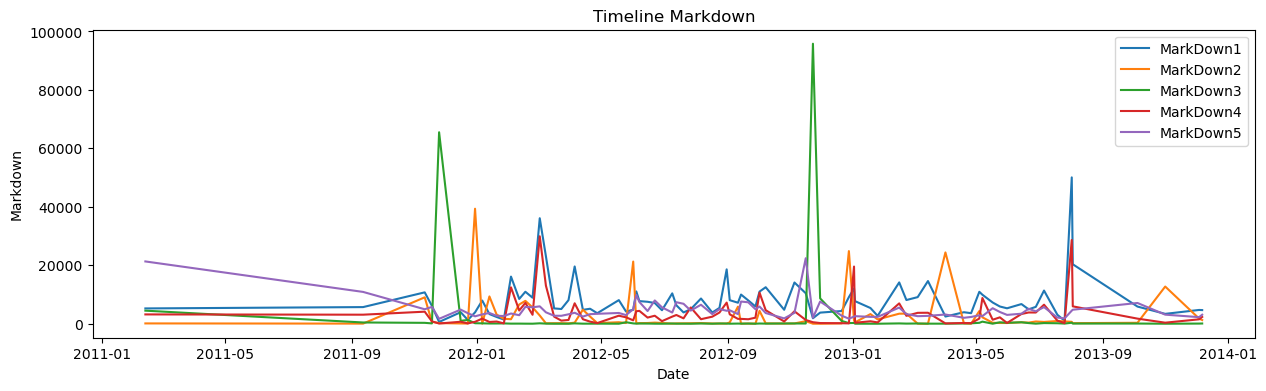

In [28]:
#show trends of different MarkDown over date
df_markdown = data_table[data_table.MarkDown2.notnull()]
df_markdown = df_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(df_markdown.index,df_markdown.MarkDown1,label='MarkDown1')
ax.plot(df_markdown.index,df_markdown.MarkDown2,label='MarkDown2')
ax.plot(df_markdown.index,df_markdown.MarkDown3,label='MarkDown3')
ax.plot(df_markdown.index,df_markdown.MarkDown4,label='MarkDown4')
ax.plot(df_markdown.index,df_markdown.MarkDown5,label='MarkDown5')
ax.set_title("Timeline Markdown")
ax.set_ylabel("Markdown")
ax.set_xlabel("Date")
ax.legend()

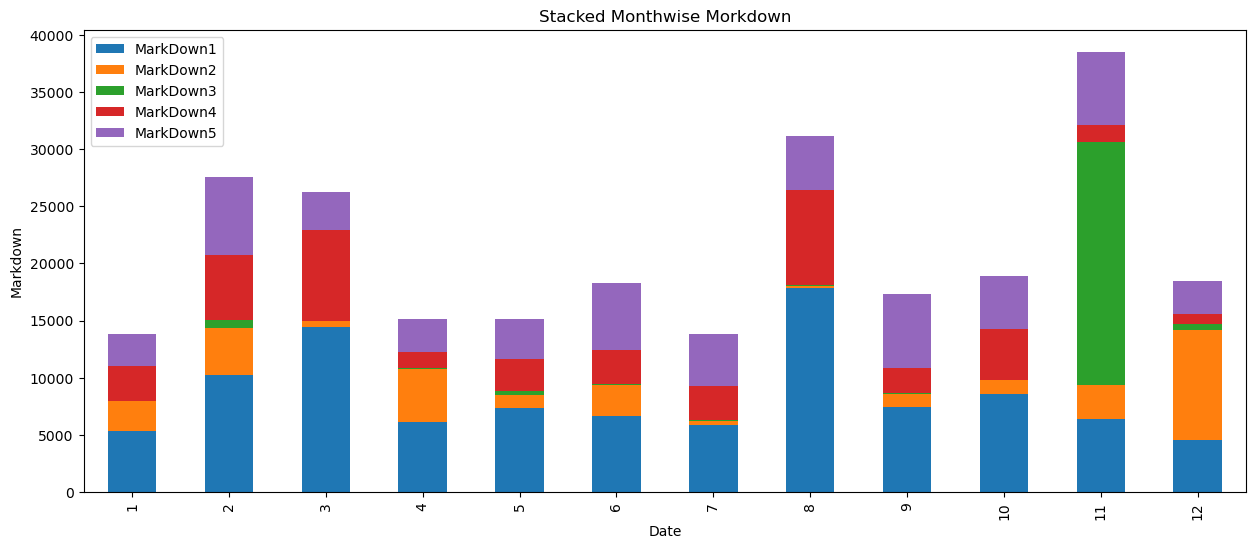

In [29]:
#show stack of different MarkDown over month
df_markdown_month = df_markdown.groupby(df_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

fig, ax = plt.subplots(figsize=(15,6))
df_markdown_month.plot(kind='bar', stacked=True, ax=ax)
ax.set_title("Stacked Monthwise Morkdown")
ax.set_ylabel("Markdown")
plt.show()

November had the most promotional markdowns due to holidays. And markdown3(the green one) may be Black Friday sales.

## Data reduction technique(PCA)

In [30]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [31]:
#Perform a principal component analysis of the whole table ignoring the non-numerical columns.
pcs = PCA()
pcs.fit(df[['Store','Dept','Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,61284.5017,21922.8662,7207.7606,5527.8841,4947.1781,3702.0166,1806.1818,39.3311,30.1328,17.6755,12.1937,1.7185,0.4111
Proportion of variance,0.8613,0.1102,0.0119,0.0070,0.0056,0.0031,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.8613,0.9716,0.9835,0.9905,0.9961,0.9993,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [32]:
#the Cumulative proportion of PC7 has reached 1
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=df[['Store','Dept','Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']].columns)
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Store,-3.846487e-05,-2.043270e-05,-0.000041,-0.000028,-2.835270e-05,0.000121,0.000130
Dept,1.373325e-06,2.133363e-04,0.000006,-0.000019,9.233430e-07,0.000005,0.000012
Weekly_Sales,1.037033e-01,9.945672e-01,-0.002614,-0.008540,1.494125e-05,-0.001343,-0.000326
Temperature,-1.745323e-05,1.206738e-05,-0.000125,-0.000178,-6.225564e-04,0.000167,-0.000652
Fuel_Price,3.057108e-08,-2.069126e-08,0.000018,0.000003,-5.047896e-06,0.000011,-0.000046
MarkDown1,1.701788e-02,-8.044922e-05,0.800004,0.004953,-1.785064e-01,-0.206230,-0.534120
MarkDown2,6.581909e-03,-3.054470e-04,0.217623,-0.009523,9.723674e-01,-0.077715,0.031111
MarkDown3,3.162064e-03,8.089006e-03,-0.023498,0.997654,1.016008e-02,-0.062698,-0.005031
MarkDown4,8.238346e-03,3.467700e-04,0.466625,0.002025,-1.500263e-01,-0.233876,0.839633
MarkDown5,1.064198e-02,1.577684e-03,0.306359,0.066976,4.545963e-03,0.944872,0.093478


In [33]:
#Normalize each variable
pcs = PCA()
pcs.fit(preprocessing.scale(df[['Store','Dept','Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.5358,1.2425,1.1434,1.0965,1.0103,1.0005,0.9516,0.9228,0.8963,0.8502,0.8029,0.7049,0.3755
Proportion of variance,0.1814,0.1188,0.1006,0.0925,0.0785,0.0770,0.0697,0.0655,0.0618,0.0556,0.0496,0.0382,0.0108
Cumulative proportion,0.1814,0.3002,0.4008,0.4933,0.5718,0.6488,0.7184,0.7839,0.8457,0.9013,0.9509,0.9892,1.0000


In [34]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns, index=df[['Store','Dept','Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']].columns)
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Store,-0.105186,-0.517266,-0.011324,-0.054256,-0.050251,0.254569,-0.013884
Dept,0.010675,0.004904,0.210737,0.380529,-0.400011,0.681148,-0.079600
Weekly_Sales,0.104297,0.167313,0.446445,0.498964,-0.061078,-0.024328,0.049911
Temperature,-0.047862,0.062361,-0.525990,0.534402,0.018331,-0.126717,0.114953
Fuel_Price,0.252541,-0.292500,-0.227700,0.256418,0.264467,0.094019,0.548911
MarkDown1,0.585464,-0.123021,-0.107067,-0.025368,-0.090441,-0.031450,-0.235227
MarkDown2,0.193131,-0.002159,0.285756,-0.379175,-0.163211,0.078319,0.522761
MarkDown3,0.018407,0.043440,0.178838,0.017600,0.816637,0.350415,-0.277132
MarkDown4,0.537031,-0.124749,-0.091492,-0.056270,-0.140899,-0.051103,-0.421614
MarkDown5,0.405169,-0.013406,-0.061974,0.010028,0.135258,0.135159,0.206355


## Model Training

In [35]:
# import packages
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, BayesianRidge
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [46]:
df["Month"] = df.Date.dt.month
df["Year"] = df.Date.dt.year
df["WeekofYear"] = df.Date.dt.weekofyear
df.drop(['Date'],axis=1,inplace=True)
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,WeekofYear
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2010,5,17
1,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,2010,12,48
2,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,2010,5,18


In [47]:
#use data where weekly sales is not 0 as train data
df_train = df[df['Weekly_Sales']!=0]
df_test = df[df['Weekly_Sales']==0]

In [50]:
X = df_train.drop(columns=['Weekly_Sales'])
y = df_train['Weekly_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
#create models
classifiers = [
    LinearRegression(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    Lasso(alpha =16, random_state=100),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

In [52]:
#Comparing Model Performance
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score,model
name,,,
RidgeCV,36424.576060,-1.511436,"RidgeCV(alphas=array([0.001, 0.01 , 0.1 , 1. ..."
Lasso,21953.681852,0.087679,"Lasso(alpha=16, random_state=100)"
LinearRegression,21953.270376,0.087713,LinearRegression()
GradientBoostingRegressor,11680.264082,0.741751,([DecisionTreeRegressor(criterion='friedman_ms...
DecisionTreeRegressor,5969.744037,0.932540,DecisionTreeRegressor()
RandomForestRegressor,4275.301736,0.965401,"(DecisionTreeRegressor(max_features='auto', ra..."


RandomForestRegressor has the highest score 0.965

In [53]:
# use RandomForestRegressor to predict weekly sales
model = df_score.loc["RandomForestRegressor","model"]
df_test.drop(columns=['Weekly_Sales'],axis=1,inplace=True)
predict = model.predict(df_test)
predict

array([-1.7998530e+02, -4.3360000e+01, -7.0145000e+01, -7.4913900e+01,
        1.1201000e+01,  2.0235910e+02, -1.0400000e-02,  3.9736700e+01,
        2.8982400e+01,  2.1160000e+01,  3.8851800e+01,  2.5435410e+02,
       -1.1277600e+01,  7.7517400e+01,  7.9074940e+02,  6.7311240e+02,
        1.3516640e+02, -1.7913400e+01,  8.1940400e+01,  5.3526600e+01,
        2.2837600e+01,  1.0086200e+01,  2.4139800e+01,  1.3889000e+01,
        5.2128000e+02,  8.1010000e+01,  4.4580300e+01,  3.7167900e+01,
        5.9839990e+02,  1.9068200e+01, -4.6575000e+00,  2.8024386e+03,
        3.8494000e+00,  1.4012598e+03, -1.6053800e+01,  2.1718900e+01,
        6.0312100e+01,  3.1842400e+01,  1.0036000e+01,  1.4967520e+02,
        8.8890200e+01,  7.7620000e+02,  9.3538200e+01,  8.6638300e+01,
        5.2449700e+01,  4.7378000e+00,  2.4676400e+01,  2.4702700e+01,
        7.8452700e+01,  5.9107100e+01,  8.2648000e+01, -9.8805400e+01,
        4.0751400e+01,  1.1700260e+02,  1.2836980e+02,  3.9647000e+01,
      